Folks,<br><br>
I have to do this because the input data, applications, open house, and mentees, of each year is not the same! How the hell don't you define a data schema so that the analysis is going to be much more easier...

In [1]:
import pandas as pd
import numpy as np
import pickle
import json
import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
path_prefix = 'Data/'
filenames = sorted(glob.glob(path_prefix + 'champ*.xlsx'))
filenames

['Data/champ1_app.xlsx',
 'Data/champ1_mentee.xlsx',
 'Data/champ1_openhouse.xlsx',
 'Data/champ2_app.xlsx',
 'Data/champ2_mentee.xlsx',
 'Data/champ2_openhouse.xlsx',
 'Data/champ3_app.xlsx',
 'Data/champ3_mentee.xlsx',
 'Data/champ3_openhouse.xlsx']

In [3]:
# print out sheet names
dfs = []
for name in filenames:
    sheets = pd.ExcelFile(name).sheet_names
    print('%s: %s'%(name, sheets))

Data/champ1_app.xlsx: ['Announcement', 'Eliminated', 'Apollo-Mentee-Application-Form_', 'Auto Nai', 'Sheet2']
Data/champ1_mentee.xlsx: ['Sheet1', 'Copy of Sheet1 1', 'Copy of Sheet1']
Data/champ1_openhouse.xlsx: ['Form Responses 1', 'Sheet2']
Data/champ2_app.xlsx: ['Pat', "P'Kong", 'sum']
Data/champ2_mentee.xlsx: ['ใบเซ็นชื่อ', 'Sheet4', 'Mentee Status', 'Mentee Personal Info', 'Copy of Mentee Personal Info']
Data/champ2_openhouse.xlsx: ['Form Responses 1', 'Follow Up Sheet', 'BackUp', 'Email Sending 2', 'Email Sending', 'Copy of Form Responses 1', 'clean', 'Pivot Table 1']
Data/champ3_app.xlsx: ['Form Responses 1', 'Check late answers']
Data/champ3_mentee.xlsx: ['From response', 'Mentee info']
Data/champ3_openhouse.xlsx: ['Result', 'เช็คชื่อ', 'Form Responses 1', 'clean', 'Pivot Table 1', 'live studio']


In [4]:
# Keep only useful sheets
used_sheets = {
    'Data/champ1_app.xlsx': 'Apollo-Mentee-Application-Form_',
    'Data/champ1_mentee.xlsx': 'Sheet1',
    'Data/champ1_openhouse.xlsx': 'Form Responses 1',
    'Data/champ2_app.xlsx': 'Pat',
    'Data/champ2_mentee.xlsx': 'Mentee Personal Info',
    'Data/champ2_openhouse.xlsx': 'Form Responses 1',
    'Data/champ3_app.xlsx': 'Form Responses 1',
    'Data/champ3_mentee.xlsx': 'Mentee info',
    'Data/champ3_openhouse.xlsx': 'Form Responses 1'
}

# Read only the first row of each sheet to ensure that we import what we want
example = dict()
for sheet in used_sheets.keys():
    example[sheet] = pd.ExcelFile(sheet).parse(used_sheets[sheet], nrows = 1)

In [5]:
example_list = list(example.values())
example_list[0]

,Unnamed: 0,From,Received Date,undefined,undefined_2,undefined_19,undefined_3,undefined_4,undefined_7,undefined_8,...,undefined_16,undefined_17,undefined_18,undefined_19.1,undefined_20,Underlying disease,undefined_21,Dropdown2,Group1,Unnamed: 25
0,1. 5830170021_ChAMP_Engineering_Application_fo...,Suebsakul Baha,2018-09-09 00:16:04,Nidkamol Boonyanate,Tawan,5830170021,nidkamol.bo@hotmail.com,"198/61 Modi Villa Village, Moo.13, Kanchanapis...",088-261-3436,Father,...,Engineering,Civil,4,5830170021,3.34,-,-,Male,Choice1,Nidkamol Boonyanate


In [6]:
#example_list[0].iloc[0]

In [7]:
example_list[1]

,Unnamed: 0,รหัสนิสิต,ชื่อ (EN),ชื่อ (TH),โทรศัพท์,ชื่อเล่น,ภาค,รุ่น,Line,Facebook,Transcript status,Sent by
0,Pair 1,5830141921,Nattha Sae-low,ณัฏฐา แซ่โล้ว,085-256-0193,หนิว,อุตสาหการ,99,niewnhai,Nattha Saelow,sent,NaN


In [8]:
example_list[2]

,Timestamp,ชื่อจริง,นามสกุล,รหัสประตัวนิสิต,ภาควิชา
0,2018-08-20 16:49:58.326,Porncheewa,Lakpech,6040159422,Arts


In [9]:
example_list[3]

,Timestamp,Email Address,ชื่อ-นามสกุล,ชื่อเล่น,ภาควิชา,รหัสนิสิต,GPAX,Self Motivation Score 1. เขียนแต่ topic ไม่ลงมือทำ 2. มี topic ที่สนใจ จากคนอื่น และลงมือทำ 3. มี topic ที่สนใจเอง แสดงหลักฐานที่ค้นคว้า 4. มี insight แสดงการค้นคว้า อย่างจริงจัง มีความพยายาม หลาย sources และ แสดงระยะเวลา 5. ต้องเป็น topic ที่น่าสนใจ หรือ Impact ที่ชัดเจนว่าสนใจ impress us,Ability to Apply 1. ไม่แสดงหลักฐานเลยว่าได้เรียนรู้อะไร 2. ได้เรียนรู้เขียน take away แต่ไม่ชัดเจน ไม่ครบ แค่ใส่ๆมา 3. แสดงความเข้าใจได้ดี มี insight ทำให้เรารู้สึกว่าเออเค้าดูอิน 4. มีการประยุกต์ใช้บ้าง ไม่โชว์ impact 5. มีการนำสิ่งที่ได้ไปใช้ในชีวิต หรือสิ่งที่เรียนรู้มันเปลี่ยนแปลง career เค้า และเกิด impact ชัดเจน เช่น ชอบถ่ายภาพจึงไปฝึก รู้วิธีถ่าย ถ่ายเก่งหาเงินได้ มียอด follow จำนวน 1000+,Q3 เล่าถึงสิ่งที่คุณสนใจ ทำไมคุณสนใจในเรื่องนี้ คุณเรียนรู้เกี่ยวกับเรื่องนี้ด้วยวิธีไหน คุณได้อะไรจากสิ่งนี้บ้าง,Transcript,Resume หรือ CV,Recommendation Letter,Unnamed: 13
0,2019-08-22 22:38:26.840,peetza_31@hotmail.com,ธีรดนย์ แก้วนก,พีท,ภาควิชาวิศวกรรมคอมพิวเตอร์,6230257321,3.3,4,2,ผมเห็นหลายคนจากโซเชียลที่อายุยังน้อยตั้งแต่อาย...,https://drive.google.com/open?id=1qCYOsLn3jYln...,https://drive.google.com/open?id=1M6q2DNRv-GSX...,NaN,NaN


In [10]:
example_list[4]

,Pair,รหัสนิสิต,ชื่อเล่น,ชื่อ นามสกุล,Firstname Lastname,อีเมลล์,เบอร์โทรศัพท์,วันเกิด,ภาควิชา,โรคประจำตัว,อาหารที่แพ้
0,1,5930371021,ฟร้อง,พิสิฐพงศ์ จั่นเจริญ,NaN,pisitpong.ch@gmail.com,099-438-1112,1998-09-03,ภาควิชาวิศวกรรมเครื่องกล,-,-


In [11]:
example_list[5]

,Unnamed: 0,Unnamed: 1,Timestamp,คำนำหน้าชื่อ,ชื่อ,นามสกุล,ชื่อเล่น,รหัสประจำตัวนิสิต,ชั้นปี,ภาควิชา,เบอร์โทรศัพท์ที่สามารถติดต่อได้,E-mail,คุณรู้จักโครงการ ChAMP มาก่อนหรือไม่,คุณได้รับข่าวสารกิจกรรม Open House จากช่องทางใด,ในความคิดของคุณ โครงการ ChAMP Engineering คืออะไร,คำถามที่อยากถามในช่วง Q&A ของงาน Open House,ทางโครงการจะส่ง Email ยืนยันการสำรองที่นั่งให้แก่ท่าน ในกรณีที่ท่านสำรองที่นั่งได้สำเร็จ ในวันที่ 18 สิงหาคม กรุณาตรวจสอบ Email ของท่านและกดยืนยันใน Email ดังกล่าวด้วย
0,35,2019-08-10 14:26:59.051,2019-08-10 14:26:59.051,นาย,สิปปภาส,มงคลดาว,โม,6030599221,3,ไฟฟ้า,892004944,smmosk135@gmail.com,รู้จัก,ChAMP Engineering Facebook Page,คือโครงการที่เสริมสร้างความรู้ในสายอาชีพต่างๆข...,ถ้าส่วนตัวไม่ได้รู้สึกท้าทายกับการเรียนวิศวกรร...,ตกลง


In [12]:
example_list[6]
# exclude the first row, it's a trial

,Timestamp,Email Address,ชื่อ-นามสกุล,ชื่อเล่น,ที่อยู่ปัจจุบัน,เบอร์โทรศัพท์,เบอร์ติดต่อฉุกเฉิน,ความสัมพันธ์กับเจ้าของเบอร์ติดต่อฉุกเฉิน,วันเกิด,เพศ,...,Q2 คุณคิดว่าโครงการฯ มีจุดมุ่งหมายใด และคุณคิดว่าคุณจะช่วยให้โครงการฯ บรรลุจุดมุ่งหมายนั้นได้มากกว่าคนอื่นอย่างไร,Q3 เมื่ออยู่ในสถานการณ์ที่เราจำเป็นที่จะต้องทำในสิ่งที่ไม่ถนัดไม่ชอบหรือไม่เคยทำคุณมีวิธีการจัดการอย่างไรเพื่อให้คุณสามารถทำสิ่งเหล่านั้นได้สำเร็จลุล่วง,Q4 เล่าประสบการณ์ที่เคยได้ช่วยเหลือหรือแบ่งปันให้ผู้อื่น (เช่น คนรอบตัว หรือสังคม) โดยเล่าสถานการณ์ที่เกิดขึ้น การกระทำ และผลลัพธ์,Q5 ให้คุณอธิบายเกี่ยวกับกิจกรรมที่คุณเคยทำร่วมกับผู้อื่น คุณเคยพบกับปัญหาจากการทำกิจกรรมร่วมกับผู้อื่นหรือไม่ ถ้าพบปัญหา คุณมีวิธีการจัดการปัญหานั้นอย่างไร,Transcript,Resume หรือ CV,Recommendation Letter,Unnamed: 25,รุ่น Intania,Line ID สำหรับเชิญเข้ากลุ่ม กรณีผ่านเข้ารอบโครงการ
0,2020-08-17 21:53:22.451,jane_janejira79@hotmail.com,janejira,jane,11,099-193-5777,099-193-5777,มารดา,2020-05-29,หญิง,...,1111111111111111111111111111111111111111111111...,1111111111111111111111111111111111111111111111...,1111111111111111111111111111111111111111111111...,1111111111111111111111111111111111111111111111...,https://drive.google.com/open?id=1GCoEQwXr8-rv...,https://drive.google.com/open?id=1Jh69lWzpyTyn...,NaN,NaN,NaN,NaN


In [13]:
example_list[7]

,Pair,Student ID,ชื่อเล่น,Name,Tel,Email,Line ID,ชั้นปี,ภาควิชา,ที่อยู่ปัจจุบัน,เบอร์ติดต่อฉุกเฉิน,ความสัมพันธ์กับเจ้าของเบอร์ติดต่อฉุกเฉิน,วันเกิด,เพศ,สัญชาติ,ศาสนา,GPAX,โรคประจำตัว,อาหารที่แพ้
0,"Pair 1 : พี่เล้ง ศิริวัฒน์ วงศ์จารุกร, พี่โทนี...",6131793921,เซน,นภสร ทวิชศรี,089-171-9995,zenthawitsri@gmail.com,zzzzzzzen,3,สาขาวิศวกรรมสารสนเทศและการสื่อสาร(หลักสูตรนานา...,8 ซอยอินทามระ45 ถนนสุทธิสาร แขวงดินแดง เขตดินแ...,089-152-0839,มารดา,-693838.0,หญิง,ไทย,พุทธ,3.74,ไม่มี,ไม่มี


In [14]:
example_list[8]

,Unnamed: 0,Unnamed: 1,Timestamp,Email Address,ชื่อจริง,นามสกุล,รหัสนิสิต,ภาควิชา,ชั้นปี,Line ID,เบอร์โทรศัพท์,สนใจลงทะเบียนร่วมงาน Open House ในรูปแบบใด,Unnamed: 12,Unnamed: 13
0,1,2020-08-17 18:10:28.893,2020-08-17 18:10:28.893,c.peechawit@gmail.com,พีชวิชญ์,โชติศรีลือชา,6131827621,วิศวกรรมสารสนเทศและการสื่อสาร (หลักสูตรนานาชาติ),ชั้นปีที่ 3,peewit46684,818107521,Live Studio - เข้าร่วมงานที่คณะวิศวกรรมศาสตร์ ...,NaN,NaN


In [15]:
#del(example_list)

# List all columns that we want to use in each sheet
to_import = [
    ['undefined_19', 'undefined', 'undefined_2', 'undefined_16', 'undefined_17', 'undefined_20', 'Dropdown2'],
    ['รหัสนิสิต', 'ชื่อ (TH)', 'ชื่อเล่น'],
    ['Timestamp', 'รหัสประตัวนิสิต', 'ชื่อจริง', 'นามสกุล', 'ภาควิชา'],
    ['Timestamp', 'รหัสนิสิต', 'ชื่อ-นามสกุล', 'ชื่อเล่น', 'ภาควิชา', 'GPAX', 'Recommendation Letter'],
    ['รหัสนิสิต', 'ภาควิชา'],
    ['รหัสประจำตัวนิสิต', 'คำนำหน้าชื่อ', 'ชื่อ', 'นามสกุล', 'ชื่อเล่น', 'ชั้นปี', 'ภาควิชา', 'คำถามที่อยากถามในช่วง Q&A ของงาน Open House'],
    ['Timestamp', 'เพศ', 'ชื่อ-นามสกุล', 'ชื่อเล่น', 'ภาควิชา', 'รหัสนิสิต', 'GPAX'],
    ['Student ID', 'ชั้นปี', 'ภาควิชา', 'เพศ', 'GPAX'],
    ['Timestamp', 'รหัสนิสิต', 'ชื่อจริง', 'นามสกุล', 'ภาควิชา', 'ชั้นปี']
]

dfs = {}
count = 0
for name in used_sheets.keys():
    temp_df = pd.read_excel(name, sheet_name=used_sheets[name], usecols=to_import[count])
    dfs[name[5:-5]] = temp_df
    count += 1
    print(count)

1
2
3
4
5
6
7
8
9


In [16]:
dfs.keys()

dict_keys(['champ1_app', 'champ1_mentee', 'champ1_openhouse', 'champ2_app', 'champ2_mentee', 'champ2_openhouse', 'champ3_app', 'champ3_mentee', 'champ3_openhouse'])

<h2>Description</h2>
<p> We will generate a table of every person </p>

In [17]:
# Fix datasets' columns
dfs['champ1_app'].columns = ['Name-Surname', 'Nickname', 'ID', 'Faculty', 'Department', 'GPAX', 'Gender']
dfs['champ1_mentee'].columns = ['ID', 'Name-Surname', 'Nickname']
dfs['champ1_openhouse'].columns = ['Timestamp', 'ID', 'Name', 'Surname', 'Department']
dfs['champ2_app'].columns = ['Timestamp', 'Name-Surname', 'Nickname', 'Department', 'ID' , 'GPAX', 'Recommendation Letter']
dfs['champ2_mentee'].columns = ['ID', 'Department']
dfs['champ2_openhouse'].columns = ['ID', 'Title', 'Name', 'Surname', 'Nickname', 'Year', 'Department', 'Question']
dfs['champ3_app'].columns = ['Timestamp', 'Name-Surname', 'Nickname', 'Gender', 'Department', 'ID', 'GPAX']
dfs['champ3_mentee'].columns = ['ID', 'Year', 'Department', 'Gender', 'GPAX']
dfs['champ3_openhouse'].columns = ['Timestamp', 'ID', 'Name', 'Surname', 'Department', 'Year']

In [18]:
# Remove duplicates
for table in dfs.keys():
    dfs[table].drop_duplicates(subset = 'ID', keep = 'last',
                               inplace = True)
    dfs[table].reset_index(drop = True, inplace = True)

In [19]:
# The first row of ChAMP 3 application is a trial row
# We need to remove it
dfs['champ3_app'] = dfs['champ3_app'].iloc[1:]

In [20]:
dfs['champ3_app'].head(2)

,Timestamp,Name-Surname,Nickname,Gender,Department,ID,GPAX
1,2020-08-23 20:30:56.596,ฐิติรัตน์ เจริญวัย,แนน,หญิง,ภาควิชาวิศวกรรมอุตสาหการ,6030163221,3.36
2,2020-09-02 11:06:48.066,วรกร ศศิจุลกะ,เจ,ชาย,สาขาวิศวกรรมการออกแบบและการผลิตยานยนต์ (หลักสู...,6031843521,3.38


## Fix Champ 1 App's Dirty Department Input

In [21]:
app1 = dfs['champ1_app']
unique_dirty_dep = app1['Department'].unique()
unique_dirty_dep

array(['Civil', 'Mechanical engineering', 'Industrial', 'Mechanical',
       'civil', 'Chemical Engineering', 'Industrial Engineering',
       'Mechanic', 'Automotive', 'Electrical', 'mechanical', 'automotive',
       'indrustrial', 'Environmental', 'Elactrical', 'Nano', 'ICE',
       'Nanoengineering', 'MECHANICAL', 'Computer',
       'Computer Engineering', 'ADME', 'NANO-Engineering', 'Environment',
       'Mechanical engineer', 'Civil Engineering', 'electrical',
       'Mechanical Engineering', 'Chemical', 'Mechanical Engineer',
       'Chemical engineering', 'Electrical Engineering', 'Metallugical',
       'Survey', 'Survey Engineering', 'Mining',
       'Environmental Engineering', 'Chemistry',
       'Information and Communication', 'Aerospace', 'ADME-ISE',
       'Nano engineering', 'Automotive Design and Manufacturing (ADME) ',
       'Industrial ', 'Industrial Engineer'], dtype=object)

In [22]:
"""
NOTE:
    81 == ADME
    82 == ICE
    83 == NANO
    84 == AERO
    31 == Automotive (Thai)
    The rest is the department code
"""
# The dep_id_list is the list of unique number of each department
# following the unique_dirty_dep
dep_id_list = [1, 3, 4, 3, 1, 5, 4, 3, 31, 2, 3, 31, 4, 7, 2, 
               82, 83, 82, 3, 10, 10, 81, 82, 7, 3, 1, 2, 3, 5, 3,
               5, 2, 9, 8, 8, 6, 7, 5, 83, 84, 81, 82, 81, 4, 4]

dirty_to_id = {k: v for k, v in zip(unique_dirty_dep, dep_id_list)}
#cleansing

cleaned_dep = [x.strip() for x in dfs['champ2_app'].Department.unique()]

cleaned_dep_id = [10,4,8,5,1,3,83,2,84,11,85,81,82,7,6,9]

id_to_clean = {k: v for k, v in zip(cleaned_dep_id, cleaned_dep)}
# Add วิศวกรรมยานยนต์
id_to_clean[31] = 'ภาควิชาวิศวกรรมยานยนต์'

# Merge two dicts
dep_clean_dict = {k: id_to_clean[dirty_to_id[k]] for k in dirty_to_id.keys()}

In [23]:
app1.Department = app1.Department.replace(dep_clean_dict)

In [24]:
app1.head()

,Name-Surname,Nickname,ID,Faculty,Department,GPAX,Gender
0,Nidkamol Boonyanate,Tawan,5830170021,Engineering,ภาควิชาวิศวกรรมโยธา,3.34,Male
1,Warapol Lowattanamart,Jay,5830486421,Engineering,ภาควิชาวิศวกรรมเครื่องกล,3.29,Male
2,Chayakorn Tangchitporn,Kaing,5830100121,Engineering,ภาควิชาวิศวกรรมอุตสาหการ,3.47,Male
3,THANAWICH BUPPHAVES,ICE,5930232421,Engineering,ภาควิชาวิศวกรรมเครื่องกล,3.86,Male
4,Tharatep,Angkachatchai,5930246221,Engineering,ภาควิชาวิศวกรรมโยธา,3.63,Male


In [25]:
# Insert into dfs
dfs['champ1_app'] = app1

In [26]:
dfs['champ1_app'].head()

,Name-Surname,Nickname,ID,Faculty,Department,GPAX,Gender
0,Nidkamol Boonyanate,Tawan,5830170021,Engineering,ภาควิชาวิศวกรรมโยธา,3.34,Male
1,Warapol Lowattanamart,Jay,5830486421,Engineering,ภาควิชาวิศวกรรมเครื่องกล,3.29,Male
2,Chayakorn Tangchitporn,Kaing,5830100121,Engineering,ภาควิชาวิศวกรรมอุตสาหการ,3.47,Male
3,THANAWICH BUPPHAVES,ICE,5930232421,Engineering,ภาควิชาวิศวกรรมเครื่องกล,3.86,Male
4,Tharatep,Angkachatchai,5930246221,Engineering,ภาควิชาวิศวกรรมโยธา,3.63,Male


In [27]:
# champ3_app's first row is a trial row, get rid of it
dfs['champ3_app'] = dfs['champ3_app'].iloc[1:].reset_index(drop = True)
dfs['champ3_app'].head()

,Timestamp,Name-Surname,Nickname,Gender,Department,ID,GPAX
0,2020-09-02 11:06:48.066,วรกร ศศิจุลกะ,เจ,ชาย,สาขาวิศวกรรมการออกแบบและการผลิตยานยนต์ (หลักสู...,6031843521,3.38
1,2020-09-07 11:33:59.614,วัชรากร โอสถานุภาพ,คิม,ชาย,ภาควิชาวิศวกรรมโยธา,6230483821,3.47
2,2020-09-07 12:21:36.570,ญาดา เคลือบวิจิตร,มายด์,หญิง,สาขาวิศวกรรมการออกแบบและการผลิตยานยนต์ (หลักสู...,6131747021,2.52
3,2020-09-07 23:20:27.673,ปพิชญา ผุดผ่อง,พิว,หญิง,ภาควิชาวิศวกรรมเหมืองแร่ และปิโตรเลียม,6130927521,3.18
4,2020-09-07 23:48:31.046,วริทธิ์พล ศรีพรม,ท๊อป,ชาย,ภาควิชาวิศวกรรมคอมพิวเตอร์,6031052421,2.95


<h1 style="color: red;">Save to Excel</h1>

In [28]:
with pd.ExcelWriter('Data/alldata_new.xlsx') as writer:
    for table in dfs.keys():
        dfs[table].to_excel(writer, sheet_name=table, index=False)

### Question 1: How many rejected candidates were selected as a mentee for a next year program

In [29]:
rejected_id_1 = [x for x in dfs['champ1_app']['ID']
                 if x not in dfs['champ1_mentee']['ID'] and
                 str(x)[:2] in ['59', '60']]

In [30]:
success_2_from_1 = [x for x in dfs['champ2_mentee']['ID'] if x in rejected_id_1]

<b>Second chance rate</b>: the ratio of candidates who got rejected in ChAMP 1 but got accepted in ChAMP 2 to all ChAMP 1 candidates who got rejected (consider only ChAMP 1 candidates who still have a chance to apply in ChAMP 2).

In [31]:
print('Second chance rate = %.2f' % (len(success_2_from_1) / len(rejected_id_1) * 100))

Second chance rate = 16.00


<b>Old school rate: </b> the ratio of ChAMP 2 mentees who applied and got rejected in ChAMP 1 to all ChAMP 2 mentees who is not in first year.

In [32]:
print('Old school rate = %.2f' % (len(success_2_from_1) * 100 / 72))

Old school rate = 11.11


## !!! Retention Rate !!!

If an applicant gets rejected, how likely will they try again and apply in ChAMP next year?

In [33]:
# use rejected_id_1 from above
apply_2_from_1 = [x for x in dfs['champ2_app']['ID'] if x in rejected_id_1]

print('Retention rate from ChAMP 1 to ChAMP 2: %.2f' %
      (len(apply_2_from_1) / len(rejected_id_1) * 100))

Retention rate from ChAMP 1 to ChAMP 2: 34.00


In [34]:
rejected_id_2 = [x for x in dfs['champ2_app']['ID']
                 if x not in dfs['champ2_mentee']['ID'] and
                 str(x)[:2] in ['60', '61']]  

apply_3_from_2 = [x for x in dfs['champ3_app']['ID']
                  if x in rejected_id_2]

In [35]:
print('Retention rate from ChAMP 2 to ChAMP 3: %.2f' % 
      (len(apply_3_from_2) / len(rejected_id_2) * 100))


Retention rate from ChAMP 2 to ChAMP 3: 30.00


In [36]:
print("Number of ChAMP 1 applicants =", dfs['champ1_app'].shape[0])
print("Number of ChAMP 2 applicants =", dfs['champ2_app'].shape[0])
print("Number of ChAMP 3 applicants =", dfs['champ3_app'].shape[0])

Number of ChAMP 1 applicants = 127
Number of ChAMP 2 applicants = 237
Number of ChAMP 3 applicants = 221


In [37]:
# Old school success odd
# If a failure candidate in ChAMP 1 apply again in ChAMP 2
# How likely will they be selected as a ChAMP 2 mentee

# use success_2_from_1 from above

len(success_2_from_1) / len(apply_2_from_1) * 100

47.05882352941176

# Application by Department

In [38]:
dfs['champ1_app'][['Department', 'ID']].groupby('Department').count()

,ID
Department,
ภาควิชาวิศวกรรมคอมพิวเตอร์,5
ภาควิชาวิศวกรรมยานยนต์,3
ภาควิชาวิศวกรรมสำรวจ,2
ภาควิชาวิศวกรรมสิ่งแวดล้อม,6
ภาควิชาวิศวกรรมอุตสาหการ,20
ภาควิชาวิศวกรรมเคมี,8
ภาควิชาวิศวกรรมเครื่องกล,28
ภาควิชาวิศวกรรมเหมืองแร่ และปิโตรเลียม,1
ภาควิชาวิศวกรรมโยธา,18


In [39]:
dfs['champ2_app'][['Department', 'ID']].groupby('Department').count().sort_values(by = 'ID', ascending = False)

,ID
Department,
ภาควิชาวิศวกรรมอุตสาหการ,43
ภาควิชาวิศวกรรมเครื่องกล,30
ภาควิชาวิศวกรรมไฟฟ้า,29
สาขาวิศวกรรมการออกแบบและการผลิตยานยนต์ (หลักสูตรนานาชาติ),25
ภาควิชาวิศวกรรมคอมพิวเตอร์,20
ภาควิชาวิศวกรรมโยธา,19
ภาควิชาวิศวกรรมเคมี,18
สาขาวิศวกรรมนาโน (หลักสูตรนานาชาติ),15
สาขาวิศวกรรมสารสนเทศและการสื่อสาร(หลักสูตรนานาชาติ),14


In [40]:
dfs['champ3_app'][['Department', 'ID']].groupby('Department').count().sort_values(by = 'ID', ascending = False)

,ID
Department,
สาขาวิศวกรรมสารสนเทศและการสื่อสาร(หลักสูตรนานาชาติ),36
ภาควิชาวิศวกรรมอุตสาหการ,27
ภาควิชาวิศวกรรมเคมี,21
ภาควิชาวิศวกรรมโยธา,21
ภาควิชาวิศวกรรมเครื่องกล,19
สาขาวิศวกรรมการออกแบบและการผลิตยานยนต์ (หลักสูตรนานาชาติ),18
สาขาวิศวกรรมอากาศยาน (หลักสูตรนานาชาติ),17
ภาควิชาวิศวกรรมคอมพิวเตอร์,13
ภาควิชาวิศวกรรมสำรวจ,11


In [41]:
def dep_year_split(data):
    """Pivot an input table into a dataframe with Department as rows and Year as columns"""
    temp = data[['Department', 'ID']]
    temp['Year'] = temp['ID'].apply(lambda x: str(x)[:2])
    return temp.groupby(['Year', 'Department']).count()

In [42]:
dep_year_split(dfs['champ1_app']).reset_index().pivot(index = 'Department', columns = 'Year', values = 'ID').fillna(0).astype(int)

Year,57,58,59,60,61
Department,,,,,
ภาควิชาวิศวกรรมคอมพิวเตอร์,0,3,0,2,0
ภาควิชาวิศวกรรมยานยนต์,0,0,3,0,0
ภาควิชาวิศวกรรมสำรวจ,0,2,0,0,0
ภาควิชาวิศวกรรมสิ่งแวดล้อม,0,5,1,0,0
ภาควิชาวิศวกรรมอุตสาหการ,0,11,8,1,0
ภาควิชาวิศวกรรมเคมี,0,7,1,0,0
ภาควิชาวิศวกรรมเครื่องกล,1,13,11,2,1
ภาควิชาวิศวกรรมเหมืองแร่ และปิโตรเลียม,0,1,0,0,0
ภาควิชาวิศวกรรมโยธา,0,12,5,1,0


In [43]:
app2 = dep_year_split(dfs['champ2_app']).reset_index().pivot(index = 'Department', columns = 'Year', values = 'ID').fillna(0).astype(int)
app2

Year,58,59,60,61,62
Department,,,,,
ภาควิชาวิศวกรรมคอมพิวเตอร์,1,8,8,1,2
ภาควิชาวิศวกรรมนิวเคลียร์,0,0,0,1,0
ภาควิชาวิศวกรรมสำรวจ,0,3,2,1,0
ภาควิชาวิศวกรรมสิ่งแวดล้อม,0,4,0,1,0
ภาควิชาวิศวกรรมอุตสาหการ,0,20,19,4,0
ภาควิชาวิศวกรรมเคมี,0,9,7,2,0
ภาควิชาวิศวกรรมเครื่องกล,0,19,10,0,1
ภาควิชาวิศวกรรมเหมืองแร่ และปิโตรเลียม,0,1,1,0,0
ภาควิชาวิศวกรรมโยธา,0,13,6,0,0


In [44]:
app3 = dep_year_split(dfs['champ3_app']).reset_index().pivot(index = 'Department', columns = 'Year', values = 'ID').fillna(0).astype(int)
app3

Year,60,61,62,63,ุ6,ุุ
Department,,,,,,
ภาควิชาวิศวกรรมคอมพิวเตอร์,6,4,0,3,0,0
ภาควิชาวิศวกรรมสำรวจ,4,6,1,0,0,0
ภาควิชาวิศวกรรมสิ่งแวดล้อม,2,4,1,0,0,0
ภาควิชาวิศวกรรมอุตสาหการ,11,14,2,0,0,0
ภาควิชาวิศวกรรมเคมี,10,9,2,0,0,0
ภาควิชาวิศวกรรมเครื่องกล,8,10,0,0,1,0
ภาควิชาวิศวกรรมเหมืองแร่ และปิโตรเลียม,0,2,0,0,0,0
ภาควิชาวิศวกรรมโยธา,11,6,3,0,0,1
ภาควิชาวิศวกรรมโลหการ,3,1,0,0,0,0


# Total Applicants by Department

In [45]:
count_applicants = pd.DataFrame(columns = ['ID', 'Department'])

for table in ['champ1_app', 'champ2_app', 'champ3_app']:
    tmp = dfs[table][['ID', 'Department']]
    count_applicants = pd.concat([count_applicants, tmp])

    
# Drop duplicates
count_applicants.drop_duplicates(subset = 'ID', keep = 'last',
                                 inplace = True)

In [46]:
count_applicants.groupby('Department').count().sort_values(by = 'ID', ascending = False)

,ID
Department,
ภาควิชาวิศวกรรมอุตสาหการ,81
ภาควิชาวิศวกรรมเครื่องกล,70
ภาควิชาวิศวกรรมไฟฟ้า,55
ภาควิชาวิศวกรรมโยธา,54
สาขาวิศวกรรมสารสนเทศและการสื่อสาร(หลักสูตรนานาชาติ),53
สาขาวิศวกรรมการออกแบบและการผลิตยานยนต์ (หลักสูตรนานาชาติ),45
ภาควิชาวิศวกรรมเคมี,42
ภาควิชาวิศวกรรมคอมพิวเตอร์,34
สาขาวิศวกรรมนาโน (หลักสูตรนานาชาติ),26


## Success Rate by Department (for ChAMP 1 and 2)

In [47]:
count_applicants_12 = pd.DataFrame(columns = ['ID', 'Department'])

for table in ['champ1_app', 'champ2_app']:
    tmp = dfs[table][['ID', 'Department']]
    count_applicants_12 = pd.concat([count_applicants_12, tmp])

    
# Drop duplicates
count_applicants_12.drop_duplicates(subset = 'ID', keep = 'last',
                                 inplace = True)

In [48]:
# This part of the script cannot be executed because we
# are lack of champ1_app data
"""mentee1 = dfs['champ1_mentee']['ID']
app1 = dfs['champ1_app'][['ID', 'Department']]
#mentee1.head()
mentee1_dep = dict()
for mentee_id in mentee1:
    print(mentee_id)
    mentee1_dep[mentee_id] = app1.loc[np.argwhere(app1['ID'] == mentee_id)[0][0]]['Department']"""

"mentee1 = dfs['champ1_mentee']['ID']\napp1 = dfs['champ1_app'][['ID', 'Department']]\n#mentee1.head()\nmentee1_dep = dict()\nfor mentee_id in mentee1:\n    print(mentee_id)\n    mentee1_dep[mentee_id] = app1.loc[np.argwhere(app1['ID'] == mentee_id)[0][0]]['Department']"

# Save to .xlsx file

# Application by Time

In [49]:
def dateplot(data, date_col):
    data[date_col] = data[date_col].astype('datetime64')
    data.groupby([data[date_col].dt.month, data[date_col].dt.day]).count().plot(kind = 'bar', legend = None)
    return

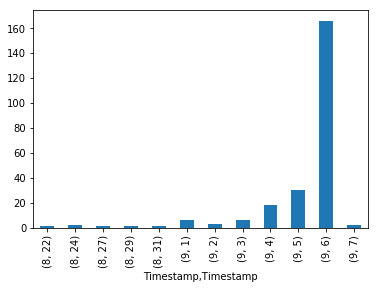

In [50]:
dateplot(dfs['champ2_app'][['Timestamp']], 'Timestamp')

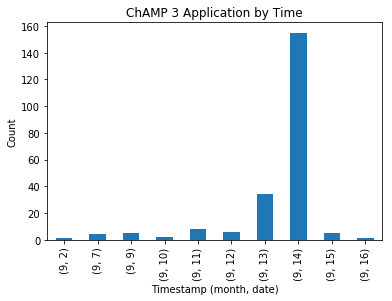

In [51]:
dateplot(dfs['champ3_app'][['Timestamp']], 'Timestamp')
plt.title('ChAMP 3 Application by Time')
plt.xlabel('Timestamp (month, date)')
plt.ylabel('Count')
plt.show()

In [52]:
dfs['champ3_app'].tail()

,Timestamp,Name-Surname,Nickname,Gender,Department,ID,GPAX
216,2020-09-15 00:02:03.117,ณัฐวัฒน์ อารยิกานนท์,ดรีม,ชาย,ภาควิชาวิศวกรรมเครื่องกล,6131313321,3.73
217,2020-09-15 00:03:01.803,ธนภัทร ทวีศุภพงษ์,ภัทร,ชาย,ภาควิชาวิศวกรรมเครื่องกล,6030247321,2.82
218,2020-09-15 00:04:41.241,จตุริทธิ์ ปานพูนทรัพย์,ตั้น,ชาย,ภาควิชาวิศวกรรมคอมพิวเตอร์,6031007221,2.45
219,2020-09-15 09:04:56.344,ณัฐวรา คุเณนทราศัย,วินนี่,หญิง,สาขาวิศวกรรมสารสนเทศและการสื่อสาร(หลักสูตรนานา...,6031749221,3.34
220,2020-09-16 13:24:09.353,สิรภพ โตบึงกอก,ตราภูมิ,ชาย,ภาควิชาวิศวกรรมเหมืองแร่ และปิโตรเลียม,6130924621,2.42
